*import Libraries*

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [30]:
df = pd.read_csv('./loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


- Let's see exact column names that have in the dataset
  
- Let's have a look on shape of dataset

In [31]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [32]:
df.shape

(4269, 13)

 *` Not enough, let's have a look on the columns and their data types using detailed info function`*

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# **Observations**
---
1. There are 4269 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.


In [34]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Observations:
---
- We have 10 columns as numeric data type and only 3 columns are object data type (according to python),but we can see ,according to our needs.
---
- Let's check the null values 

In [35]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Observations:
---
- we have not  null values in dataset
---

- So let's Visualize key features such as loan amount, education, and income

- we use To visualize pairwise relationships between multiple features (loan amount, income, etc.).

- Pair plots create scatter plots for each pair of features, allowing for a comprehensive view of relationships.

In [36]:
#  removing the space between the column names 
df.columns = df.columns.str.strip()

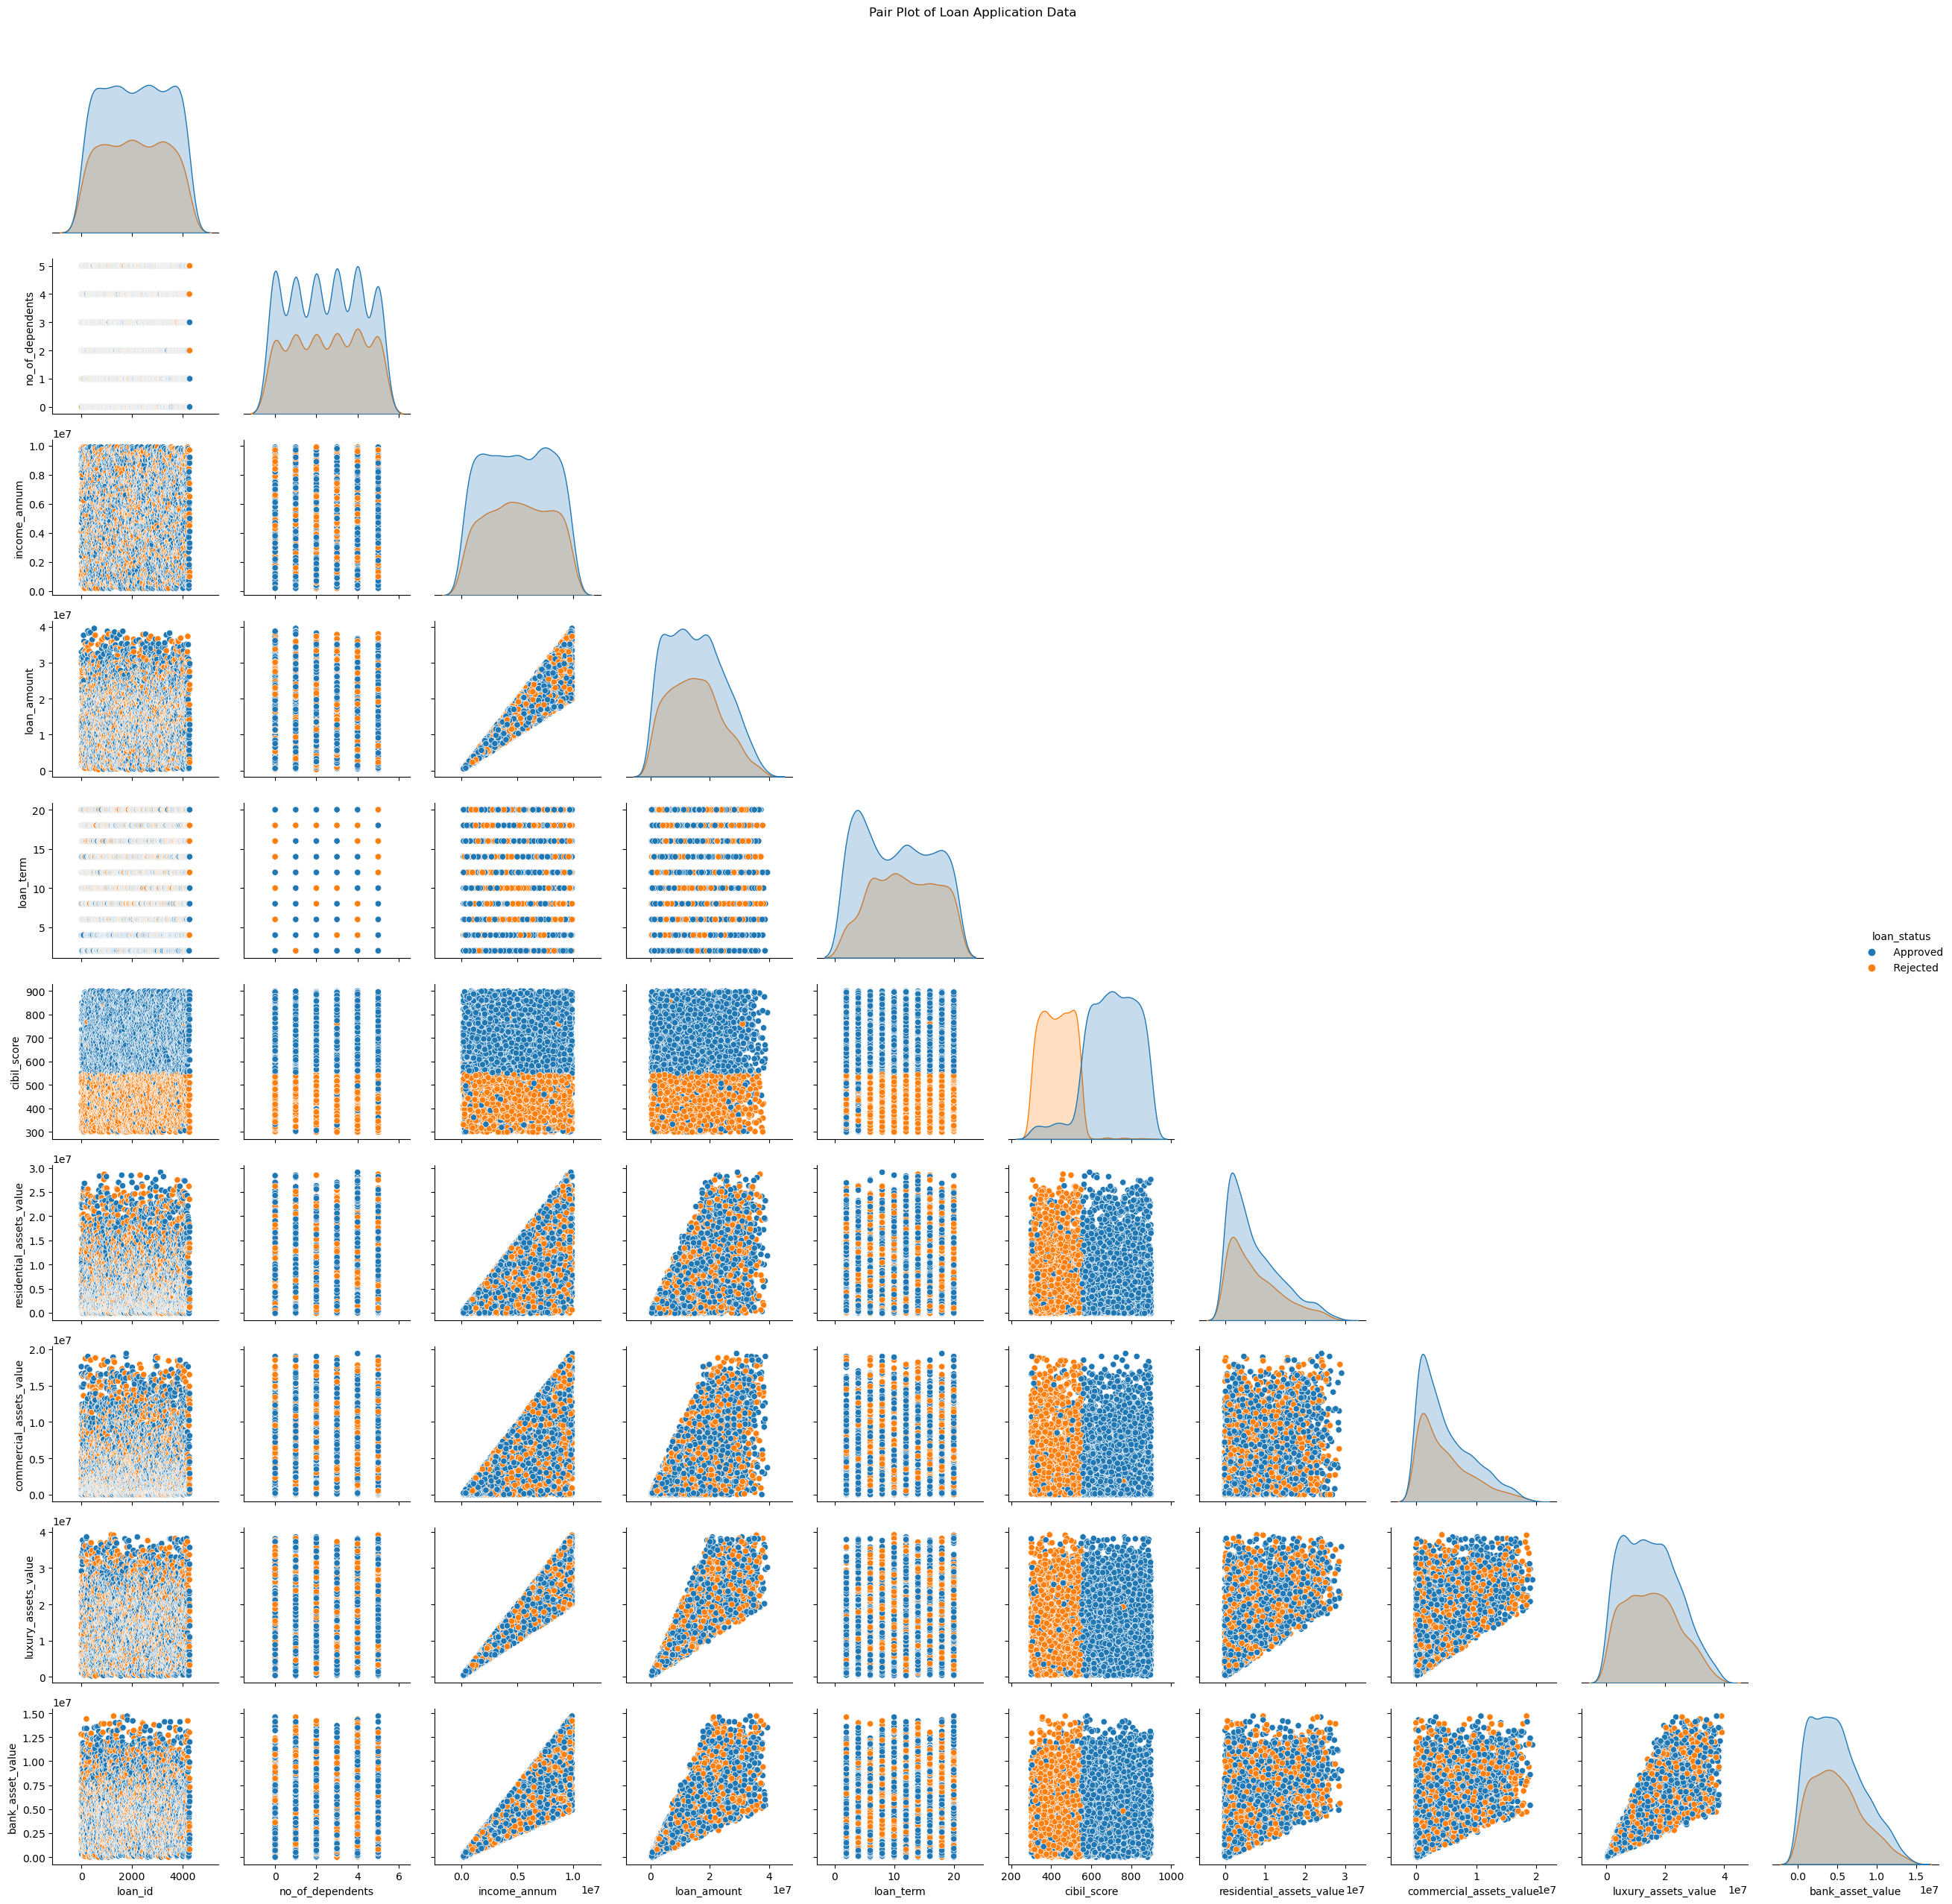

In [37]:
#Create the pair plot
sns.pairplot(df, hue='loan_status', corner=True)
plt.suptitle('Pair Plot of Loan Application Data', y=1.02)
plt.tight_layout()
plt.show()

## Observation
---
- Feature combinations don't show very strong separation between Approved and Rejected statuses.

- However, a few variables hint at some trends, especially cibil_score

- **cibil_score:**Strong positive correlation with approval

- **income_annum & loan_amount:** Correlated with each other, but approval is mixed

- **loan_term, dependents:**	No clear pattern with approval

- **asset values:**	Weak patterns, some correlation between types, not with status
---
- Now we use to **Sunburst plot** to analyze the distribution of the data. This plot is useful for showing the distribution of a dataset across multiple categories

In [38]:
# sunburst chart
df_sunburst = df.groupby(["education", "loan_status"]).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=["education", "loan_status"], values='counts')
fig11.show()

## Observation 
---

- In this **sunburst** plot , we can clearly see the **loan_status** based on the **education**

- It's shows clearly the **loan** is **Approved** or **Rejected**
--- 
- Let's more explore the relationship between variables or columns that have in the dataset

- Now we use **HeatMap** chart to visualize relationships more efficiently or more clearly   

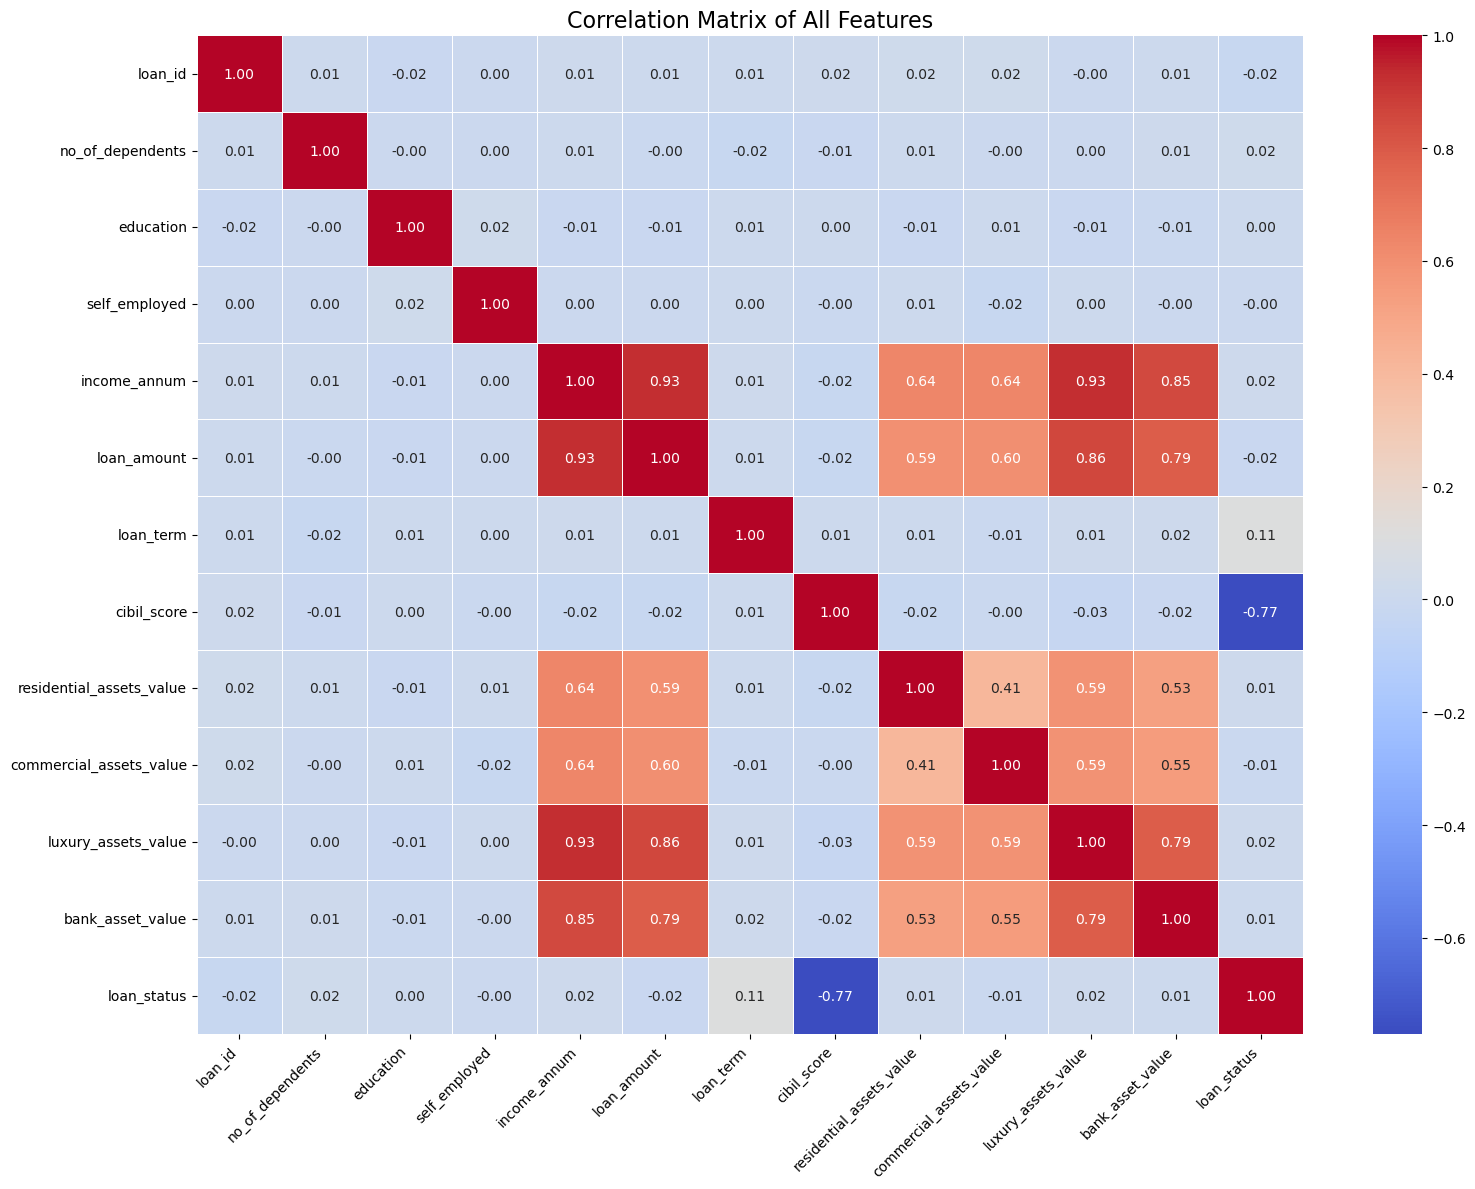

In [39]:
df_copy = df.copy()

label = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = label.fit_transform(df_copy[col])
        
correlation_matrix = df_copy.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Observation
---

- High income is a strong indicator of higher loans and greater asset values.

- **cibil_score**, **loan_term**, and **no_of_dependents**  seem less useful based on correlation.

- Be cautious of feature redundancy due to strong correlations.
---
- Check missing values

In [40]:
df.replace(['NaN', 'nan', 'None', ''], pd.NA, inplace=True)
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Observation
---
- Data clearly clean and well-organized

- we need to check the duplicates

In [41]:
df.duplicated().sum()

0

## Observation
---
- There are not have any duplicate 

- create **boxlot** to visualize the outlier

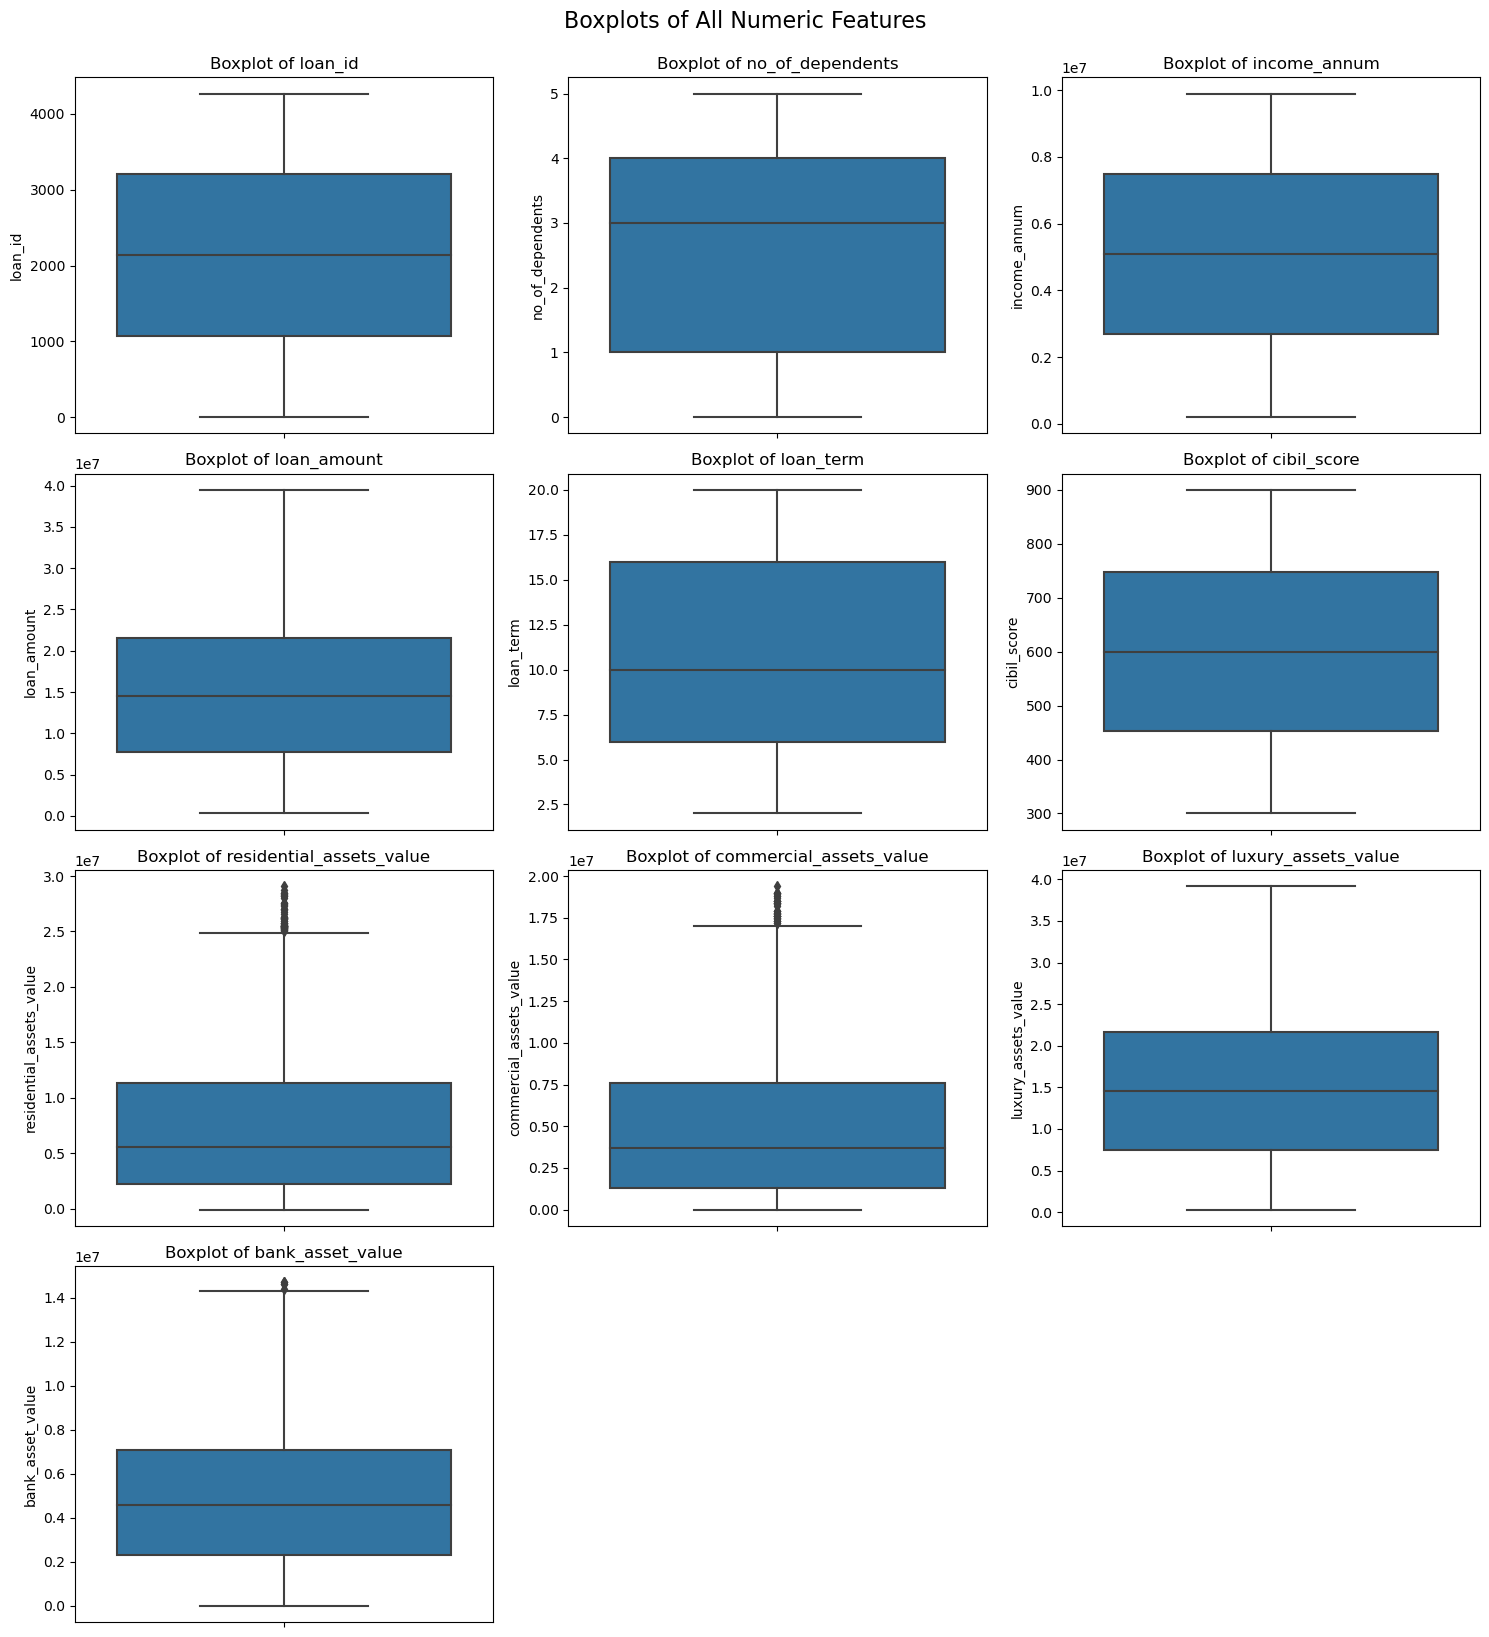

In [42]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n = len(numeric_cols)
cols = 3  
rows = (n + cols - 1) // cols  
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])  
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

# Observation
---
- **Multiple features have outliers**, especially in:

   - residential_assets_value

   - commercial_assets_value

   - bank_asset_value

   - loan_amount

   - income_annual

- **Binary features** like education and loan_status show flat boxplots (only 0s and 1s).

- **Skewed distributions** observed in income_annual and loan_amount.

- cibil_score is well-distributed with minimal outliers.

- loan_id is an identifier, not useful for prediction.
---
- Heandling categorical 
- Transform into numaricel form


In [50]:
 
cat_col = ['education','self_employed','loan_status']

for column in cat_col: 
    df[column] = label.fit_transform(df[column])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [51]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [52]:
# Split Data into Train and Test Sets
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=42)

print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (3415, 12)
y_train shape =  (3415,)
X_test shape =  (854, 12)
y_test shape =  (854,)


In [53]:
# scaling  data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.38682838,  1.51250774,  1.00263891, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-0.80430304, -1.43500078,  1.00263891, ...,  1.22311091,
         2.49843196,  0.88201987],
       [-1.59840356, -0.84549907, -0.99736803, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [ 0.7708264 ,  0.92300603,  1.00263891, ...,  1.29175048,
         1.47359943,  0.13963624],
       [ 1.32636998, -0.25599737,  1.00263891, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [-1.0526637 ,  0.92300603, -0.99736803, ..., -0.28695963,
         1.03750048, -0.10782497]])

In [54]:
#  Logistic Regression¶
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

## Observation
---
- Now you see our model is successfully trained using **LogisticRegression**

- Now we can use this model to make predictions on new data

In [55]:
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



## Observation
---
- This is the accuracy of the model. 

- It is the ratio of the number of correct predictions to the total number of predictions

- It is a measure of how well the model is able to predict the correct outcome
---
- Now , let's calculate the accuracy of the model. 

- Using **Confusion Matrix** with **Heatmap**

<Axes: >

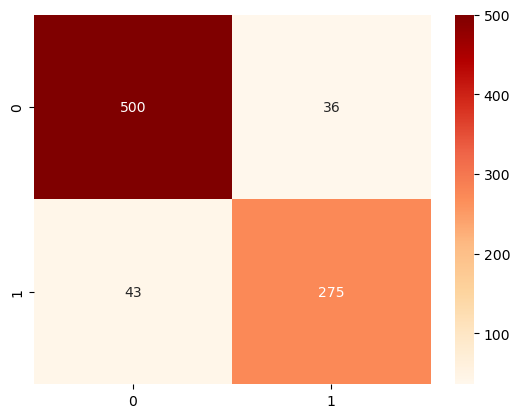

In [56]:
log_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(log_matrix, annot=True, fmt='d',cmap='OrRd', cbar=True)

## Observation
---
- Now you see the predictions of this model
- we need to measure the **precision** , **recall** and **f1_score**

In [57]:
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

print(f"Precision: {log_precision:.2f}")
print(f"Recall:    {log_recall:.2f}")
print(f"F1 Score:  {log_f1:.2f}")

Precision: 0.88
Recall:    0.86
F1 Score:  0.87


- Now you clearly see the **accuracy score** 